<a href="https://colab.research.google.com/github/b-fatma/S2I-DM/blob/master/src/merge/fire_clip_to_roi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clip Fire Data to Algeria + Tunisia

In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 49.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import geopandas as gpd
import rasterio

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
input_path = '/content/drive/MyDrive/dm_fire_prediction/fire_keep_all_fires_approach.csv'
fire_df = pd.read_csv(input_path)

In [ ]:
fire_df.head()

,Unnamed: 0,latitude,longitude,fire
0,0,35.70751,5.53337,1
1,1,32.13579,6.46961,1
2,2,32.35563,6.97630,1
3,3,28.19791,9.39581,1
4,4,28.12826,9.49323,1


In [5]:
fire_df = fire_df[['longitude', 'latitude', 'fire']]
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2863369 entries, 0 to 2863368
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   longitude  float64
 1   latitude   float64
 2   fire       int64  
dtypes: float64(2), int64(1)
memory usage: 65.5 MB


In [11]:
### Loading and merging the boundaries of Algeria and Tunisia
def load_dz_tn_boundaries(dz_shapefile_path, tn_shapefile_path):
    dz = gpd.read_file(dz_shapefile_path)
    tn = gpd.read_file(tn_shapefile_path)

    # Ensure both shapefiles use the same CRS
    if dz.crs != tn.crs:
        tn = tn.to_crs(dz.crs)

    # Concatenate the GeoDataFrames
    boundaries = gpd.GeoDataFrame(pd.concat([dz, tn], ignore_index=True), crs=dz.crs)

    return boundaries



# def clip_instance(file, boundaries=boundaries):
#     with rasterio.open(file) as src:
#         # Clip raster with shapefile
#         out_image, out_transform = mask(src, boundaries.geometry, crop=True)
#         out_meta = src.meta.copy()

#     # Update metadata
#     out_meta.update({
#         "driver": "GTiff",
#         "height": out_image.shape[1],
#         "width": out_image.shape[2],
#         "transform": out_transform
#     })

#     return out_image, out_meta

In [12]:
dz_boundaries_filepath = '/content/drive/MyDrive/dm_fire_prediction/borders/dz_shp'
tn_boundaries_filepath = '/content/drive/MyDrive/dm_fire_prediction/borders/tn_shp'

boundaries = load_dz_tn_boundaries(dz_boundaries_filepath, tn_boundaries_filepath)
boundaries

/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'dz_shp': 'gadm41_DZA_0' (default), 'gadm41_DZA_1', 'gadm41_DZA_2'. Specify layer parameter to avoid this warning.
  result = read_func(
/usr/local/lib/python3.12/dist-packages/pyogrio/geopandas.py:275: UserWarning: More than one layer found in 'tn_shp': 'gadm41_TUN_2' (default), 'gadm41_TUN_0', 'gadm41_TUN_1'. Specify layer parameter to avoid this warning.
  result = read_func(


,GID_0,COUNTRY,geometry,GID_2,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,DZA,Algeria,"MULTIPOLYGON (((2.84187 36.7369, 2.84413 36.74...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TUN,Tunisia,"POLYGON ((10.13861 36.89453, 10.14495 36.89476...",TUN.1.1_1,TUN.1_1,Ariana,NA,Ariana Médina,Ariana Medina,NA,Delegation,Delegation,NA,TN.AN.AR
2,TUN,Tunisia,"POLYGON ((10.05585 36.84308, 10.06575 36.85019...",TUN.1.2_1,TUN.1_1,Ariana,NA,Ettadhamen,NA,NA,Delegation,Delegation,NA,TN.AN.ET
3,TUN,Tunisia,"MULTIPOLYGON (((10.13862 36.89416, 10.1329 36....",TUN.1.3_1,TUN.1_1,Ariana,NA,Kalaat El Andalous,NA,NA,Delegation,Delegation,NA,TN.AN.KA
4,TUN,Tunisia,"POLYGON ((10.1317 36.88428, 10.1317 36.88271, ...",TUN.1.4_1,TUN.1_1,Ariana,NA,Mnihla,NA,NA,Delegation,Delegation,NA,TN.AN.MN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,TUN,Tunisia,"POLYGON ((9.84352 36.09752, 9.83557 36.09973, ...",TUN.24.2_1,TUN.24_1,Zaghouan,NA,Fahs,NA,NA,Delegation,Delegation,NA,TN.ZA.FA
265,TUN,Tunisia,"POLYGON ((9.85318 36.09475, 9.84802 36.09626, ...",TUN.24.3_1,TUN.24_1,Zaghouan,NA,Nadhour,NA,NA,Delegation,Delegation,NA,TN.ZA.NA
266,TUN,Tunisia,"POLYGON ((10.19923 36.16115, 10.1973 36.16191,...",TUN.24.4_1,TUN.24_1,Zaghouan,NA,Saouaf,NA,NA,Delegation,Delegation,NA,TN.ZA.SA
267,TUN,Tunisia,"POLYGON ((10.23154 36.47617, 10.23126 36.47531...",TUN.24.5_1,TUN.24_1,Zaghouan,NA,Zaghouan,NA,NA,Delegation,Delegation,NA,TN.ZA.ZA


In [13]:
def clip(fire_df, boundaries):
    # Convert fire_df to a GeoDataFrame
    fire_gdf = gpd.GeoDataFrame(
        fire_df,
        geometry=gpd.points_from_xy(fire_df.longitude, fire_df.latitude),
        crs="EPSG:4326" # WGS84, common CRS for lat/lon
    )

    # Ensure the fire_gdf has the same CRS as the boundaries
    if fire_gdf.crs != boundaries.crs:
        fire_gdf = fire_gdf.to_crs(boundaries.crs)

    # Perform a spatial join to keep only the points within the boundaries
    # 'inner' join means only points that intersect with a polygon in boundaries will be kept
    clipped_fire_gdf = gpd.sjoin(fire_gdf, boundaries, how="inner", predicate='intersects')

    # Drop the 'index_right' column which is added by sjoin
    clipped_fire_gdf = clipped_fire_gdf.drop(columns=['index_right'])

    # Convert back to a pandas DataFrame if needed, or return GeoDataFrame
    # For this task, let's return a pandas DataFrame for consistency with input fire_df
    return pd.DataFrame(clipped_fire_gdf.drop(columns='geometry'))

In [14]:
clipped_fire_df = clip(fire_df, boundaries)
clipped_fire_df.head()

,longitude,latitude,fire,GID_0,COUNTRY,GID_2,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2
0,5.53337,35.70751,1,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.46961,32.13579,1,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.97630,32.35563,1,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.39581,28.19791,1,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9.49323,28.12826,1,DZA,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
clipped_fire_df.reset_index(drop=True, inplace=True)
clipped_fire_df = clipped_fire_df[['longitude', 'latitude', 'fire']]
clipped_fire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965256 entries, 0 to 1965255
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   longitude  float64
 1   latitude   float64
 2   fire       int64  
dtypes: float64(2), int64(1)
memory usage: 45.0 MB


In [17]:
clipped_fire_df[clipped_fire_df['fire'] == 1]['fire'].sum() / clipped_fire_df.shape[0] * 100

np.float64(0.6483633684364786)

<Axes: xlabel='longitude', ylabel='latitude'>

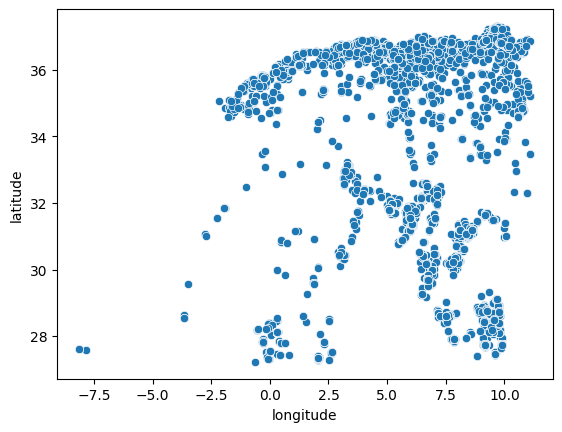

In [18]:
import seaborn as sns

sns.scatterplot(fire_df[fire_df['fire'] == 1], x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

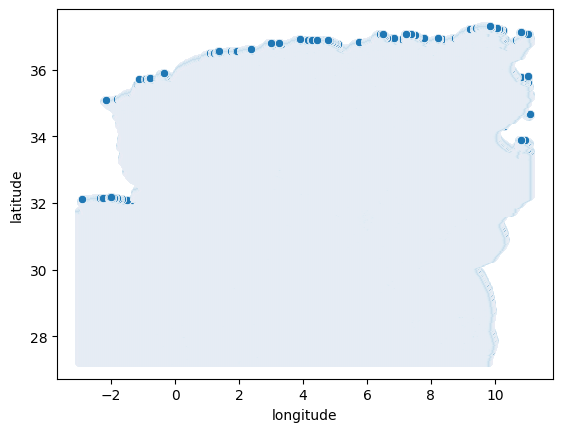

In [31]:
test = clipped_fire_df[clipped_fire_df['longitude'] > -3]
sns.scatterplot(test[test['fire'] == 0], x='longitude', y='latitude')

In [30]:
test['fire'].sum() / test.shape[0] * 100

np.float64(0.7230215418857383)

In [ ]:
output_path = '/content/drive/MyDrive/dm_fire_prediction/premerge/fire.csv'

clipped_fire_df.to_csv(output_path, index=False)